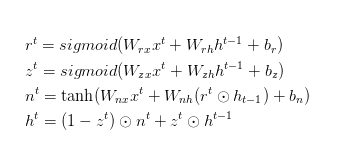

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def init_params(num_inputs, num_units, num_output):

    def normal_values_generation(shape):
        return np.random.normal(0, 1, size = shape)

    def weights_matrix_dimensions():
        return (normal_values_generation((num_inputs, num_units)),
                normal_values_generation((num_units, num_units)),
                normal_values_generation(num_units))
    W_xz, W_hz, b_z = weights_matrix_dimensions() 
    W_xr, W_hr, b_r = weights_matrix_dimensions()  
    W_xh, W_hh, b_h = weights_matrix_dimensions()  
    W_d = normal_values_generation((num_units, num_output))
    b_d = normal_values_generation(num_output)
    params = [W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_d, b_d]
    return params



In [11]:
def gru(inputs, params):
    W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q = params 
    # H, = state
    H = torch.randn((input_nodes, hidden_unit))*0.01
    outputs = []
    for X in inputs: 
        
        Z = torch.sigmoid((X @ W_xz) + (H @ W_hz) + b_z)
        R = torch.sigmoid((X @ W_xr) + (H @ W_hr) + b_r)
        H_tilda = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)
        H = Z * H + (1 - Z) * H_tilda
        Y = H @ W_hq + b_q
    
    return H

In [13]:
def ConvertSignalToDataset(signal, step):
  X = []
  y = []
  for i in range(len(signal)-step):
    j = i + step
    X.append(signal[i:j])
    y.append(signal[j])

  return np.array(X), np.array(y)


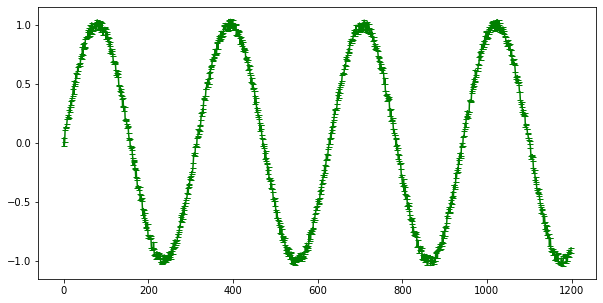

In [37]:
N = 1200
t = np.arange(0,N)
data_sin = np.sin(0.02 * t) + np.random.uniform(-0.05, 0.05, N)
plt.figure(figsize=(10,5))
plt.plot(data_sin, marker='_',color='green')


In [14]:
seq_length = 20
X, y = ConvertSignalToDataset(data_sin, seq_length)
X = torch.Tensor(X)
input_nodes = 20
hidden_unit = 64
output_nodes = 1
params = init_params(input_nodes, hidden_unit, output_nodes)

In [18]:
GRU = gru(X, params)

In [43]:
w_ = params[9]
b_ = params[10]

output=np.matmul(GRU, w_) + b_